In [ ]:
from google.colab import drive
drive.mount('/gdrive')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import os

Mounted at /gdrive


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
mountpoint = os.path.join(os.path.abspath('.'), 'drive')
drive.mount(mountpoint, force_remount=True)
classroom = os.path.join(mountpoint, 'MyDrive/Classroom/UE10 Machine Learning for Finance using Python M2 Finance FIT & FiRE 2023-2024/Clustering/')
os.listdir(classroom)

Mounted at /content/drive


['Vehicle_policies_2020.csv']

In [ ]:
poli=pd.read_csv(os.path.join(classroom,os.listdir(classroom)[0]), sep = ',')

In [ ]:
poli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60392 entries, 0 to 60391
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pol_number      60392 non-null  int64  
 1   pol_eff_dt      60392 non-null  object 
 2   gender          60392 non-null  object 
 3   agecat          55561 non-null  float64
 4   date_of_birth   60392 non-null  object 
 5   credit_score    57591 non-null  float64
 6   area            60392 non-null  object 
 7   traffic_index   56889 non-null  float64
 8   veh_age         60392 non-null  int64  
 9   veh_body        60392 non-null  object 
 10  veh_value       60392 non-null  float64
 11  claim_office    10030 non-null  object 
 12  numclaims       60392 non-null  int64  
 13  claimcst0       60392 non-null  float64
 14  annual_premium  60392 non-null  float64
dtypes: float64(6), int64(3), object(6)
memory usage: 6.9+ MB


In [ ]:
poli.describe()

,pol_number,agecat,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,annual_premium
count,6.039200e+04,55561.000000,57591.000000,56889.000000,60392.000000,60392.000000,60392.000000,60392.000000,60392.00
mean,5.499204e+07,3.488310,662.193190,103.892536,2.673748,1.956051,0.214250,644.875932,716.53
std,2.587003e+07,1.425133,136.450182,33.688679,1.068058,1.330279,0.552291,3354.631809,0.00
min,1.000040e+07,1.000000,301.000000,0.000000,1.000000,0.000000,0.000000,0.000000,716.53
25%,3.280473e+07,2.000000,602.000000,80.300000,2.000000,1.111000,0.000000,0.000000,716.53
50%,5.500180e+07,3.000000,682.000000,108.300000,3.000000,1.650000,0.000000,0.000000,716.53
75%,7.729614e+07,5.000000,772.000000,132.000000,4.000000,2.365000,0.000000,0.000000,716.53
max,9.999838e+07,6.000000,850.000000,207.000000,4.000000,38.016000,5.000000,69478.897830,716.53


In [ ]:
!pip install kneed

In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
poli.head()

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
0,43124327,12/30/2020,F,4.0,7/12/1968,381.0,D,133.6,2,HBACK,1.331,NaN,0,0.0,716.53
1,21919609,12/30/2020,F,2.0,11/5/1982,549.0,D,163.6,1,UTE,3.740,NaN,0,0.0,716.53
2,72577057,12/30/2020,M,2.0,11/26/1983,649.0,B,117.5,4,COUPE,0.880,NaN,0,0.0,716.53
3,92175225,12/30/2020,M,4.0,11/2/1960,743.0,B,100.7,3,SEDAN,1.045,NaN,0,0.0,716.53
4,66223239,12/30/2020,F,4.0,1/4/1968,817.0,C,115.5,4,HBACK,0.473,NaN,0,0.0,716.53


In [ ]:
df = poli.drop(['pol_eff_dt','date_of_birth'], axis= 1)
df[['gender','agecat','area','veh_body','claim_office']] = df[['gender','agecat','area','veh_body','claim_office']].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60392 entries, 0 to 60391
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   pol_number      60392 non-null  int64   
 1   gender          60392 non-null  category
 2   agecat          55561 non-null  category
 3   credit_score    57591 non-null  float64 
 4   area            60392 non-null  category
 5   traffic_index   56889 non-null  float64 
 6   veh_age         60392 non-null  int64   
 7   veh_body        60392 non-null  category
 8   veh_value       60392 non-null  float64 
 9   claim_office    10030 non-null  category
 10  numclaims       60392 non-null  int64   
 11  claimcst0       60392 non-null  float64 
 12  annual_premium  60392 non-null  float64 
dtypes: category(5), float64(5), int64(3)
memory usage: 4.0 MB


In [ ]:
df['annual_premium'].unique()

array([716.53])

In [ ]:
df = pd.get_dummies(df)#.drop('sex_.',axis=1)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [ ]:
preprocessed = pd.DataFrame(data=X,columns=df.columns)
preprocessed.head(10)

,pol_number,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,annual_premium,gender_F,gender_M,...,veh_body_PANVN,veh_body_RDSTR,veh_body_SEDAN,veh_body_STNWG,veh_body_TRUCK,veh_body_UTE,claim_office_A,claim_office_B,claim_office_C,claim_office_D
0,-0.458748,-2.060793,0.881831,-0.630822,-0.469868,-0.387933,-0.192236,0.0,0.87171,-0.87171,...,-0.105357,-0.01909,-0.698361,-0.561771,-0.162891,-0.269914,-0.18531,-0.267683,-0.128433,-0.228911
1,-1.278418,-0.829564,1.772346,-1.567108,1.341045,-0.387933,-0.192236,0.0,0.87171,-0.87171,...,-0.105357,-0.01909,-0.698361,-0.561771,-0.162891,3.704884,-0.18531,-0.267683,-0.128433,-0.228911
2,0.679750,-0.096690,0.403922,1.241752,-0.808898,-0.387933,-0.192236,0.0,-1.14717,1.14717,...,-0.105357,-0.01909,-0.698361,-0.561771,-0.162891,-0.269914,-0.18531,-0.267683,-0.128433,-0.228911
3,1.437319,0.592213,-0.094767,0.305465,-0.684863,-0.387933,-0.192236,0.0,-1.14717,1.14717,...,-0.105357,-0.01909,1.431925,-0.561771,-0.162891,-0.269914,-0.18531,-0.267683,-0.128433,-0.228911
4,0.434143,1.134540,0.344554,1.241752,-1.114851,-0.387933,-0.192236,0.0,0.87171,-0.87171,...,-0.105357,-0.01909,-0.698361,-0.561771,-0.162891,-0.269914,-0.18531,-0.267683,-0.128433,-0.228911
5,-0.624730,0.577555,1.463634,1.241752,-0.221798,-0.387933,-0.192236,0.0,0.87171,-0.87171,...,-0.105357,-0.01909,-0.698361,-0.561771,-0.162891,-0.269914,-0.18531,-0.267683,-0.128433,-0.228911
6,1.402801,-0.946824,0.834337,0.305465,-0.817167,-0.387933,-0.192236,0.0,-1.14717,1.14717,...,-0.105357,-0.01909,-0.698361,-0.561771,-0.162891,-0.269914,-0.18531,-0.267683,-0.128433,-0.228911
7,-1.607218,0.137830,1.496286,1.241752,-0.841974,-0.387933,-0.192236,0.0,-1.14717,1.14717,...,-0.105357,-0.01909,-0.698361,-0.561771,-0.162891,3.704884,-0.18531,-0.267683,-0.128433,-0.228911
8,1.431216,1.112554,1.300373,1.241752,-0.734477,-0.387933,-0.192236,0.0,0.87171,-0.87171,...,-0.105357,-0.01909,1.431925,-0.561771,-0.162891,-0.269914,-0.18531,-0.267683,-0.128433,-0.228911
9,0.595695,0.269748,-0.629076,0.305465,-0.784091,-0.387933,-0.192236,0.0,0.87171,-0.87171,...,-0.105357,-0.01909,1.431925,-0.561771,-0.162891,-0.269914,-0.18531,-0.267683,-0.128433,-0.228911


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.impute import SimpleImputer

# Assuming preprocessed is your DataFrame with NAs
# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
preprocessed_imputed = pd.DataFrame(imputer.fit_transform(preprocessed), columns=preprocessed.columns)


In [ ]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(preprocessed_imputed)
dfx_pca.explained_variance_ratio_

array([7.30873191e-02, 5.66240360e-02, 4.99189898e-02, 4.76072600e-02,
       3.91466335e-02, 3.75895236e-02, 3.44799248e-02, 3.38638320e-02,
       3.32166833e-02, 3.26419817e-02, 3.14807976e-02, 3.00993329e-02,
       2.90572145e-02, 2.81924764e-02, 2.80669262e-02, 2.76019127e-02,
       2.74949574e-02, 2.71518398e-02, 2.69719084e-02, 2.67551720e-02,
       2.65921980e-02, 2.64984047e-02, 2.63824700e-02, 2.63168211e-02,
       2.61675626e-02, 2.59503575e-02, 2.51945150e-02, 2.42493601e-02,
       2.09002823e-02, 1.70105926e-02, 1.44689480e-02, 7.30724044e-03,
       6.27275010e-03, 3.08827790e-03, 2.55149797e-03, 1.44139322e-32,
       2.84496554e-33, 1.75230923e-33, 6.32271320e-35])

In [ ]:
n_components=sum(dfx_pca.explained_variance_ratio_>0.1)

In [ ]:
pca = PCA(n_components=2)
df_PCA = pca.fit_transform(preprocessed_imputed)

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

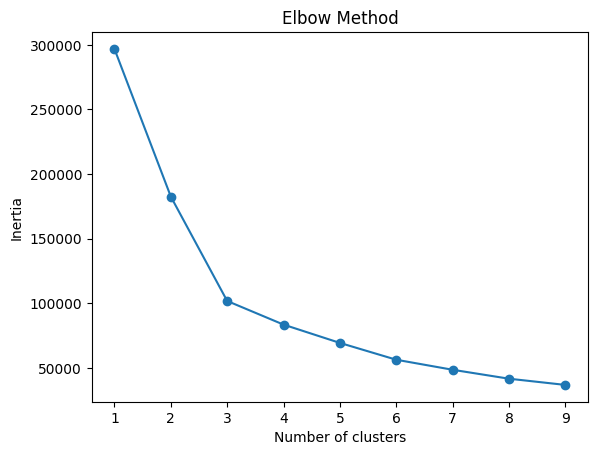

In [ ]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


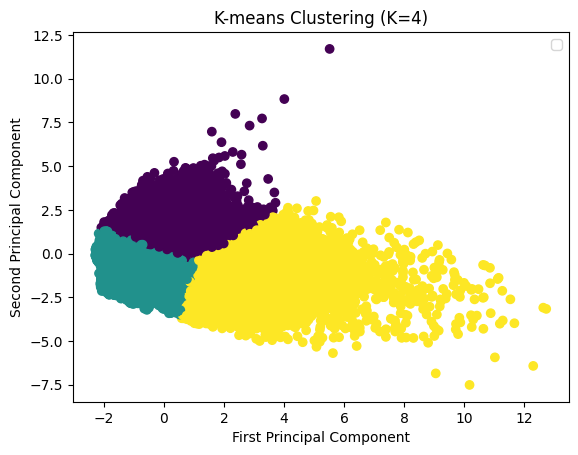

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(df_PCA)
plt.scatter(df_PCA[:, 0], df_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={3)')
plt.legend()
plt.show()

In [ ]:
poli['label'] = kmeans.labels_
numeric_columns = ['pol_number', 'credit_score', 'traffic_index','veh_age','veh_value', 'numclaims', 'claimcst0','annual_premium','label']
stats = poli[numeric_columns].groupby('label').mean()
stats

,pol_number,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,annual_premium
label,,,,,,,,
0,5.525351e+07,690.545760,87.717256,2.576079,2.613642,0.017506,19.374826,716.53
1,5.492750e+07,679.032139,112.217186,2.733659,1.470065,0.021311,13.073987,716.53
2,5.460144e+07,538.165554,113.469624,2.702332,2.034350,1.299630,4155.872910,716.53


In [ ]:
poli

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium,label
0,43124327,12/30/2020,F,4.0,7/12/1968,381.0,D,133.6,2,HBACK,1.331,NaN,0,0.0,716.53,1
1,21919609,12/30/2020,F,2.0,11/5/1982,549.0,D,163.6,1,UTE,3.740,NaN,0,0.0,716.53,0
2,72577057,12/30/2020,M,2.0,11/26/1983,649.0,B,117.5,4,COUPE,0.880,NaN,0,0.0,716.53,1
3,92175225,12/30/2020,M,4.0,11/2/1960,743.0,B,100.7,3,SEDAN,1.045,NaN,0,0.0,716.53,1
4,66223239,12/30/2020,F,4.0,1/4/1968,817.0,C,115.5,4,HBACK,0.473,NaN,0,0.0,716.53,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60387,73248694,1/2/2020,F,5.0,5/10/1956,809.0,C,145.5,4,HBACK,0.891,NaN,0,0.0,716.53,1
60388,71411764,1/2/2020,M,4.0,3/22/1961,681.0,D,86.3,1,HBACK,1.881,NaN,0,0.0,716.53,0
60389,89353155,1/2/2020,M,4.0,9/29/1965,773.0,F,110.0,1,STNWG,5.170,NaN,0,0.0,716.53,0
60390,40916605,1/2/2020,M,3.0,8/1/1978,714.0,B,NaN,1,HBACK,1.903,NaN,0,0.0,716.53,0
